Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

data = pd.read_csv('stud_math.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Видим, что у нас 30 признаков - 13 количественных и 17 номинативных. Также видим, что у 8 признаков присутствуют только два значения - yes и no, ниже приведем их к виду 1 и 0.

In [76]:
# переименуем столбец studytime, granular

data.rename(columns = {'studytime, granular': 'studytime_granular'}, inplace = True)

В датасете есть признаки (schoolsup, famsup, paid, activities, nursery, higher, internet, romantic), которые принимают значения да или нет. Изменим эти значения на 1, если значение да, и 0, если значение нет.

In [77]:
# напишем функцию, для признаков, у которых только 2 значения
def to_bool(x):
    if pd.isnull(x):
        return x
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    if x == 'GP':
        return 1
    if x == 'MS':
        return 0
    if x == 'F':
        return 1
    if x == 'M':
        return 0
    if x == 'U':
        return 1
    if x == 'R':
        return 0
    if x == 'T':
        return 1
    if x == 'A':
        return 0
    if x == 'GT3':
        return 1
    if x == 'LE3':
        return 0

In [78]:
# применим функцию to_bool к нужным столбцам, у которым в данных всего 2 значения - yes и no

columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet','romantic']

for item in columns:
    data[item] = data[item].apply(to_bool)

In [ ]:
# school

In [79]:
display(pd.DataFrame(data.school.value_counts()))
data.loc[:,['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
school    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [80]:
print('Количество уникальных значений:', data.school.nunique())
print('Количество пропусков:', data.school.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 0


В нашем датафрейме присутствуют представители двух школ, причем представителей школы GP в семь раз больше, чем школы MS. Пропусков у данного признака нет.

In [ ]:
# sex

In [81]:
display(pd.DataFrame(data.sex.value_counts()))
data.loc[:,['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
sex    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [82]:
print('Количество уникальных значений:', data.sex.nunique())
print('Количество пропусков:', data.sex.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 0


В данных присутствуют представители обоих полов, причем девочек немного больше, чем мальчиков. Пропусков у данного признака нет.

In [ ]:
# age

In [83]:
display(pd.DataFrame(data.age.value_counts()))
data.loc[:,['age']].info()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


In [84]:
print('Количество уникальных значений:', data.age.nunique())
print('Количество пропусков:', data.age.isnull().sum())

Количество уникальных значений: 8
Количество пропусков: 0


В датасете присутствуют ученики в возрасте от 15 до 22 лет, возласт большинства представителей от 15 до 18 лет. Пропусков у данного признака нет.

In [ ]:
# address

In [85]:
display(pd.DataFrame(data.address.value_counts()))
data.loc[:,['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
address    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [86]:
print('Количество уникальных значений:', data.address.nunique())
print('Количество пропусков:', data.address.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 17


Учеников, живущих в городе, в 3.5 раза больше, чем учеников, живущих за городом. Есть некоторое количество пропусков. Заполним их самым часть встречающимся значением.

In [87]:
freq = data.address.loc[data.address.value_counts().max()]

data.address = data.address.apply(lambda x: freq if pd.isnull(x) else x)

In [ ]:
# famsize

In [88]:
display(pd.DataFrame(data.famsize.value_counts()))
data.loc[:,['famsize']].info()

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    368 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [50]:
print('Количество уникальных значений:', data.famsize.nunique())
print('Количество пропусков:', data.famsize.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 27


Учеников, живущих в семьях, где количество человек не превосходит 3-х, в два раза меньше, чем учеников, в семьях которых больше 3-х человек. Есть небольшое количество пропусков, заполним их наиболее частым значением.

In [89]:
freq_famsize = data.famsize.loc[data.famsize.value_counts().max()]

data.famsize = data.famsize.apply(lambda x: freq_famsize if pd.isnull(x) else x)

In [ ]:
# Pstatus

In [90]:
display(pd.DataFrame(data.Pstatus.value_counts()))
data.loc[:,['Pstatus']].info()

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    350 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [91]:
print('Количество уникальных значений:', data.Pstatus.nunique())
print('Количество пропусков:', data.Pstatus.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 45


Подавляющее количество родителей учеников живут вместе (314), раздельно живут родители 36 учеников. Есть некоторое количество пропусков (45). Заменим пропуски наиболее часто встречающимся значением.

In [92]:
freq_pstatus = data.Pstatus.loc[data.Pstatus.value_counts().max()]

data.Pstatus = data.Pstatus.apply(lambda x: freq_pstatus if pd.isnull(x) else x)

In [ ]:
# Medu

In [93]:
display(pd.DataFrame(data.Medu.value_counts()))
data.loc[:,['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [61]:
print('Количество уникальных значений:', data.Medu.nunique())
print('Количество пропусков:', data.Medu.isnull().sum())

Количество уникальных значений: 5
Количество пропусков: 3


У матерей большинства учеников высшее образование. Есть единичные пропуски значений. Т.к. пропусков очень мало, заменим их самым часть встречающимся значением.

In [94]:
data.Medu = data.Medu.apply(lambda x: 4 if pd.isnull(x) else x)

In [ ]:
# Fedu

In [97]:
display(pd.DataFrame(data.Fedu.value_counts()))
data.loc[:,['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [98]:
print('Количество уникальных значений:', data.Fedu.nunique())
print('Количество пропусков:', data.Fedu.isnull().sum())

Количество уникальных значений: 6
Количество пропусков: 24


Значение 40.0 - выброс, так как градация уровня образования идет от 0 до 4. Скорей всего это опечатка и действительное значение должно быть 4. Заменим его на 4.

In [131]:
data.Fedu = data.Fedu.apply(lambda x: 4.0 if x == 40.0 else x)

У большинства отцов учеников уровень образования 5-9 классов. Есть некоторое количество пропусков. Заменим пропуски на самое часто встречающееся значение.

In [100]:
freq_fedu = data.Fedu.loc[data.Fedu.value_counts().max()]

data.Fedu = data.Fedu.apply(lambda x: freq_fedu if pd.isnull(x) else x)

In [ ]:
# Mjob

In [102]:
display(pd.DataFrame(data.Mjob.value_counts()))
data.loc[:,['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [103]:
print('Количество уникальных значений:', data.Mjob.nunique())
print('Количество пропусков:', data.Mjob.isnull().sum())

Количество уникальных значений: 5
Количество пропусков: 19


Работа матерей большинства учеников - other, на втором месте идет гос. служба. Есть некоторое количество пропусков. Заменим пропуски самым часто встречающимся значением.

In [106]:
data.Mjob = data.Mjob.apply(lambda x: 'other' if pd.isnull(x) else x)

In [ ]:
# Fjob

In [109]:
display(pd.DataFrame(data.Fjob.value_counts()))
data.loc[:,['Fjob']].info()

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [110]:
print('Количество уникальных значений:', data.Fjob.nunique())
print('Количество пропусков:', data.Fjob.isnull().sum())

Количество уникальных значений: 5
Количество пропусков: 36


Работа отцов большинства учеников - other, на втором месте идет гос. служба. Есть некоторое количество пропусков. Заменим пропуски самым часто встречающимся значением.

In [112]:
freq_fjob = data.Fjob.loc[data.Fjob.value_counts().max()]

data.Fjob = data.Fjob.apply(lambda x: freq_fjob if pd.isnull(x) else x)

In [ ]:
# reason

In [114]:
display(pd.DataFrame(data.reason.value_counts()))
data.loc[:,['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [115]:
print('Количество уникальных значений:', data.reason.nunique())
print('Количество пропусков:', data.reason.isnull().sum())

Количество уникальных значений: 4
Количество пропусков: 17


Для большинства учеников причиной выбора школы стала образовательная программа. Есть некоторое количество пропусков. Заменим пропуски самым часто встречающимся значением.

In [117]:
data.reason = data.reason.apply(lambda x: 'course' if pd.isnull(x) else x)

In [ ]:
# guardian

In [119]:
display(pd.DataFrame(data.guardian.value_counts()))
data.loc[:,['guardian']].info()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [121]:
print('Количество уникальных значений:', data.guardian.nunique())
print('Количество пропусков:', data.guardian.isnull().sum())

Количество уникальных значений: 3
Количество пропусков: 31


Для большинства учеников опекуном является мама. Есть некоторое количество пропусков. Заменим пропуски самым часто встречающимся значением.

In [123]:
freq_guardian = data.guardian.loc[data.guardian.value_counts().max()]

data.guardian = data.guardian.apply(lambda x: freq_guardian if pd.isnull(x) else x)

In [ ]:
# traveltime

In [125]:
display(pd.DataFrame(data.traveltime.value_counts()))
data.loc[:,['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [126]:
print('Количество уникальных значений:', data.traveltime.nunique())
print('Количество пропусков:', data.traveltime.isnull().sum())

Количество уникальных значений: 4
Количество пропусков: 28


Для большинства учеников дорога до школы занимает не больше 15 минут. Есть некоторое количество пропусков.

In [128]:
freq_traveltime = data.traveltime.loc[data.traveltime.value_counts().max()]

data.traveltime = data.traveltime.apply(lambda x: freq_traveltime if pd.isnull(x) else x)

In [ ]:
# studytime

In [131]:
display(pd.DataFrame(data.studytime.value_counts()))
data.loc[:,['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [132]:
print('Количество уникальных значений:', data.studytime.nunique())
print('Количество пропусков:', data.studytime.isnull().sum())

Количество уникальных значений: 4
Количество пропусков: 7


Большинство учеников выделяют на учебу вне школы от 2 до 5 часов в неделю. Есть единичные пропуски в данных. Заполним проруски самым часто встречающимся значением.

In [134]:
data.studytime = data.studytime.apply(lambda x: 2 if pd.isnull(x) else x)

In [ ]:
# failures

In [136]:
display(pd.DataFrame(data.failures.value_counts()))
data.loc[:,['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [137]:
print('Количество уникальных значений:', data.failures.nunique())
print('Количество пропусков:', data.failures.isnull().sum())

Количество уникальных значений: 4
Количество пропусков: 22


Большинство учеников не имеют внеучебные неудачи. Также есть некоторое количество пропусков. Заполним пропуски самым часто встречающимся значением.

In [138]:
data.failures = data.failures.apply(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
# schoolsup

In [140]:
display(pd.DataFrame(data.schoolsup.value_counts()))
data.loc[:,['schoolsup']].info()

,schoolsup
0.0,335
1.0,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    386 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [141]:
print('Количество уникальных значений:', data.schoolsup.nunique())
print('Количество пропусков:', data.schoolsup.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 9


Подавляющее число учеников не имеет дополнительной образовательной поддержки. Есть некоторое количество пропусков. Заполним их самым часто встречающимся значением.

In [142]:
data.schoolsup = data.schoolsup.apply(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
# famsup

In [143]:
display(pd.DataFrame(data.famsup.value_counts()))
data.loc[:,['famsup']].info()

,famsup
1.0,219
0.0,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    356 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [144]:
print('Количество уникальных значений:', data.famsup.nunique())
print('Количество пропусков:', data.famsup.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 39


У большинства учеников есть образовательная поддержка со стороны семьи, но также количество учеников, кто не получает образовательную поддержку со стороны семьи, тоже большое. Есть некоторое количество пропусков, заполним их самым часто встречающимся значением.

In [146]:
freq_famsup = data.famsup.loc[data.famsup.value_counts().max()]

data.famsup = data.famsup.apply(lambda x: freq_famsup if pd.isnull(x) else x)

In [ ]:
# paid

In [148]:
display(pd.DataFrame(data.paid.value_counts()))
data.loc[:,['paid']].info()

,paid
0.0,200
1.0,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    355 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [149]:
print('Количество уникальных значений:', data.paid.nunique())
print('Количество пропусков:', data.paid.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 40


Большинство учеников не посещает дополнительные платные занятия по математике - 200 человек, но тех, кто посещает, большое количество - 155. Заполним пропуски самым часто встречающимся значением.

In [151]:
data.paid = data.paid.apply(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
# activities

In [153]:
display(pd.DataFrame(data.activities.value_counts()))
data.loc[:,['activities']].info()

,activities
1.0,195
0.0,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
activities    381 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [154]:
print('Количество уникальных значений:', data.activities.nunique())
print('Количество пропусков:', data.activities.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 14


Количество учеников, посещающих и не посещающих дополнительные внеучебные активности, примерно одинаковое количество, но тех, кто посещает, немного больше. Есть некоторое количество пропусков. Заполним пропуски наиболее часто встречающимся значением.

In [156]:
freq_activities = data.activities.loc[data.activities.value_counts().max()]

data.activities = data.activities.apply(lambda x: freq_activities if pd.isnull(x) else x)

In [ ]:
# nursery

In [158]:
display(pd.DataFrame(data.nursery.value_counts()))
data.loc[:,['nursery']].info()

,nursery
1.0,300
0.0,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    379 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [159]:
print('Количество уникальных значений:', data.nursery.nunique())
print('Количество пропусков:', data.nursery.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 16


Подавляющее число учеников посещало детский сад. Есть некоторое количество пропусков. Заполним их наиболее часто встречающимся значением.

In [161]:
data.nursery = data.nursery.apply(lambda x: 1 if pd.isnull(x) else x)

In [ ]:
# studytime_granular

In [162]:
display(pd.DataFrame(data.studytime_granular.value_counts()))
data.loc[:,['studytime_granular']].info()

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime_granular    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [163]:
print('Количество уникальных значений:', data.studytime_granular.nunique())
print('Количество пропусков:', data.studytime_granular.isnull().sum())

Количество уникальных значений: 4
Количество пропусков: 7


Неведомый признак, для большинства учеников характерно значение -6 (это должно быть количество часов, затрачиваемых на что-то, возможно, значение обратно пропорционально studytime). Есть небольшое количество пропусков, заполним их самыми частыми значениями.

In [165]:
data.studytime_granular = data.studytime_granular.apply(lambda x: -6 if pd.isnull(x) else x)

In [ ]:
# higher

In [167]:
display(pd.DataFrame(data.higher.value_counts()))
data.loc[:,['higher']].info()

,higher
1.0,356
0.0,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    375 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [168]:
print('Количество уникальных значений:', data.higher.nunique())
print('Количество пропусков:', data.higher.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 20


Подавляющее число учеников собираются получать высшее образование. Есть некоторое количество пропусков, заполним их самым частым значением.

In [169]:
data.higher = data.higher.apply(lambda x: 1 if pd.isnull(x) else x)

In [ ]:
# internet

In [170]:
display(pd.DataFrame(data.internet.value_counts()))
data.loc[:,['internet']].info()

,internet
1.0,305
0.0,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    361 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [171]:
print('Количество уникальных значений:', data.internet.nunique())
print('Количество пропусков:', data.internet.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 34


У подавляющего большинства учеников есть дома интернет. Есть некоторое количество пропусков, заполним их самым частым значением.

In [172]:
data.internet = data.internet.apply(lambda x: 1 if pd.isnull(x) else x)

In [ ]:
# romantic

In [173]:
display(pd.DataFrame(data.romantic.value_counts()))
data.loc[:,['romantic']].info()

,romantic
0.0,240
1.0,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    364 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [174]:
print('Количество уникальных значений:', data.romantic.nunique())
print('Количество пропусков:', data.romantic.isnull().sum())

Количество уникальных значений: 2
Количество пропусков: 31


В датасете в два раза больше учеников, которые не состоят в романтических отношениях, чем тех, кто состоит. Есть некоторое количество пропусков, заполним их самым частым значением.

In [175]:
data.romantic = data.romantic.apply(lambda x: 0 if pd.isnull(x) else x)

In [ ]:
# famrel 

In [176]:
display(pd.DataFrame(data.famrel.value_counts()))
data.loc[:,['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [177]:
print('Количество уникальных значений:', data.famrel.nunique())
print('Количество пропусков:', data.famrel.isnull().sum())

Количество уникальных значений: 6
Количество пропусков: 27


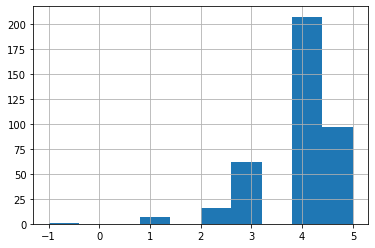

In [211]:
# распределение значений

data.famrel.hist()

У большинства учеников хорошие отношения в семье (на 4-ку). Есть некорректное начение -1, скорее всего это опечатка, поэтому исправлю его на 1. Есть некоторое количество пропусков, которые мы заполним самым частым значением.

In [149]:
data.famrel = data.famrel.apply(lambda x: 1 if x == -1 else x)

In [179]:
data.famrel = data.famrel.apply(lambda x: 4 if pd.isnull(x) else x)

In [ ]:
# freetime 

In [180]:
display(pd.DataFrame(data.freetime.value_counts()))
data.loc[:,['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    384 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [181]:
print('Количество уникальных значений:', data.freetime.nunique())
print('Количество пропусков:', data.freetime.isnull().sum())

Количество уникальных значений: 5
Количество пропусков: 11


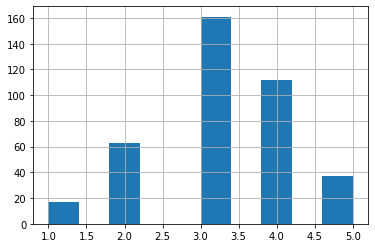

In [212]:
# распределение значений

data.freetime.hist()

У большинства учеников среднее количество свободного времени. Есть некоторое количество пропусков, которые мы заполним самым часто встречающимся значением.

In [182]:
data.freetime = data.freetime.apply(lambda x: 3 if pd.isnull(x) else x)

In [ ]:
# goout

In [183]:
display(pd.DataFrame(data.goout.value_counts()))
data.loc[:,['goout']].info()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [184]:
print('Количество уникальных значений:', data.goout.nunique())
print('Количество пропусков:', data.goout.isnull().sum())

Количество уникальных значений: 5
Количество пропусков: 8


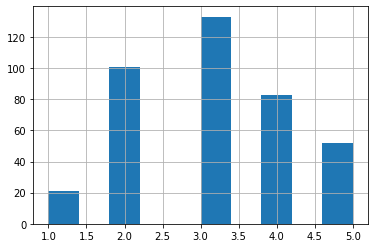

In [213]:
# распределение значений

data.goout.hist()

Большинство учеников проводят с друзьями среднее количество времени. Есть небольшое количество пропусков, которые мы заполним самым часто встречающимся значением.

In [185]:
data.goout = data.goout.apply(lambda x: 3 if pd.isnull(x) else x)

In [ ]:
# health

In [186]:
display(pd.DataFrame(data.health.value_counts()))
data.loc[:,['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [187]:
print('Количество уникальных значений:', data.health.nunique())
print('Количество пропусков:', data.health.isnull().sum())

Количество уникальных значений: 5
Количество пропусков: 15


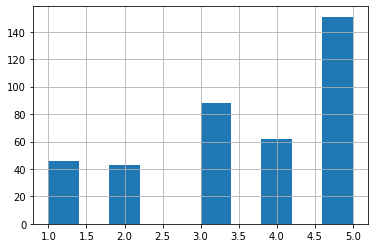

In [214]:
# распределение значений

data.health.hist()

У большинства учеников отличное здоровье. Есть некоторое количество пропусков, которые мы заполним самым часто встречающтимся значением.

In [188]:
data.health = data.health.apply(lambda x: 5 if pd.isnull(x) else x)

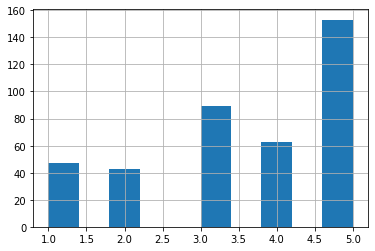

In [189]:
# распределение значений

data.health.hist()

In [ ]:
# absences

In [190]:
display(pd.DataFrame(data.absences.value_counts()))
data.loc[:,['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    383 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [191]:
print('Количество уникальных значений:', data.absences.nunique())
print('Количество пропусков:', data.absences.isnull().sum())

Количество уникальных значений: 36
Количество пропусков: 12


In [192]:
# заполним пропуски самым частым значением

data.absences = data.absences.apply(lambda x: 0 if pd.isnull(x) else x)

count    395.000000
mean       7.058228
std       23.138935
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

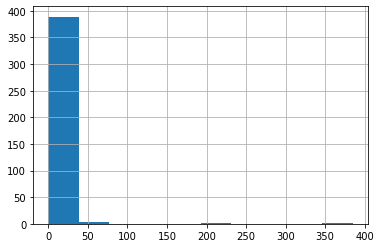

In [193]:
display(data.absences.describe())
data.absences.hist()

Большинство учеников занятия не пропускали. По гистограмме видим, основное распределение лежит между 0 и примерно 40. Есть явные выбросы 385 (больше, чем дней в году) и 212 (больше, чем полгода, за такое количество пропусков уже давно бы исключили). Отфильтруем выбросы, воспользуясь формулой интерквартильного расстояния.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


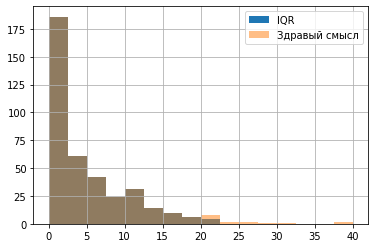

In [194]:
median = data.absences.median()
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data.absences.loc[data.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (0, 40), 
                                                                                             label = 'IQR')
data.absences.loc[data.absences <= 40].hist(alpha = 0.5, bins = 16, range = (0, 40),
                                                        label = 'Здравый смысл')
plt.legend();

Метод интерквартильного расстояния отбрасывает некоторое количество потенциально реальных значений. Не будем жертвовать ими, поэтому отфильтруем значения, которые не превышают 40.

In [195]:
data = data.loc[data.absences <= 40]

In [ ]:
# score

In [196]:
display(pd.DataFrame(data.score.value_counts()))
data.loc[:,['score']].info()

,score
50.0,54
55.0,45
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,25
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
score    384 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


In [197]:
print('Количество уникальных значений:', data.score.nunique())
print('Количество пропусков:', data.score.isnull().sum())

Количество уникальных значений: 18
Количество пропусков: 6


count    373.000000
mean      52.010724
std       22.877182
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

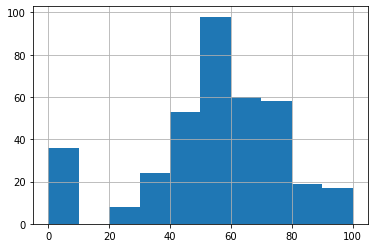

In [159]:
display(data.score.describe())
data.score.hist()

Наша целевая переменная, есть несколько пропусков, которые заполнять не будем, т.к. значений, встретившихся боьшое количество раз, довально много. Шкала оценки стобальная. Основное распределение сосредоточено в интервале от 20 до 100. Здравый смысл подсказывает, что оценка 0 маловероятна, но таких значений достаточно много. Проверим на выбросы.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


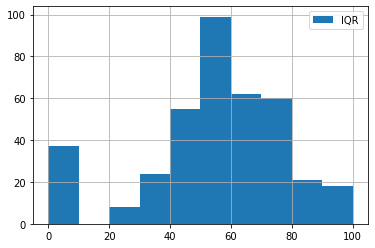

In [198]:
median = data.score.median()
perc25 = data.score.quantile(0.25)
perc75 = data.score.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data.score.loc[data.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10
                                                                                              , range = (0, 100), 
                                                                                             label = 'IQR')
plt.legend();

Метод интерквартильного расстояния показал, что выбросов для признака score у нас нет. Возможно, 0 баллов у тех, кто вообще не сдавал экзамен.

Перед построением матрицы корреляций, преобразуем данные признаков, у которых всего два значения в формат 1 и 0.

In [199]:
# применим функцию to_bool к нужным столбцам

columns = ['school', 'sex', 'address', 'famsize', 'Pstatus']

for item in columns:
    data[item] = data[item].apply(to_bool)

In [200]:
# построим матрицу корреляций
data.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,-0.023485,-0.367364,0.266646,0.052194,-0.083162,0.132883,0.055204,-0.242390,0.093101,-0.051997,0.136904,0.204981,0.027185,0.110718,0.100322,-0.093101,0.035308,0.084255,-0.067909,0.039146,-0.022480,0.015167,0.054228,0.097448,0.042207
sex,-0.023485,1.000000,0.035668,-0.001357,0.080126,-0.040316,-0.085393,0.026688,-0.050521,0.306941,-0.020283,0.129629,0.168425,0.115332,-0.116004,-0.002567,-0.306941,0.156967,-0.077153,0.134914,-0.045914,-0.224075,-0.074812,-0.142768,0.029109,-0.102819
age,-0.367364,0.035668,1.000000,-0.137133,-0.008411,0.045591,-0.159511,-0.130644,0.086332,-0.015196,0.217057,-0.247986,-0.156028,-0.021268,-0.122481,-0.092961,0.015196,-0.198709,-0.088287,0.153272,0.056258,0.020399,0.133803,-0.064287,0.180199,-0.152458
address,0.266646,-0.001357,-0.137133,1.000000,-0.057836,-0.070235,0.150816,0.052962,-0.253152,-0.043854,-0.086257,0.024729,0.042113,0.053730,-0.056448,0.025170,0.043854,0.036449,0.206752,-0.004733,-0.012965,0.049780,0.064421,-0.035424,-0.003223,0.120007
famsize,0.052194,0.080126,-0.008411,-0.057836,1.000000,0.058323,0.046950,0.057343,-0.041849,0.076070,0.003070,0.020795,0.098273,0.085152,0.020048,-0.086711,-0.076070,0.031790,-0.013415,-0.001918,0.031190,-0.006157,-0.027109,0.027580,-0.002683,-0.071203
Pstatus,-0.083162,-0.040316,0.045591,-0.070235,0.058323,1.000000,-0.132689,-0.035037,0.092876,0.003334,0.022719,-0.047394,0.001074,0.024916,0.073694,-0.086349,-0.003334,-0.067980,0.031472,-0.046347,0.020349,0.044369,0.031725,0.019318,-0.112754,-0.047448
Medu,0.132883,-0.085393,-0.159511,0.150816,0.046950,-0.132689,1.000000,0.259239,-0.166915,0.073626,-0.242023,-0.030256,0.196328,0.140327,0.094813,0.182420,-0.073626,0.162893,0.186178,0.010487,-0.011696,0.033902,0.062361,-0.067305,0.110097,0.204275
Fedu,0.055204,0.026688,-0.130644,0.052962,0.057343,-0.035037,0.259239,1.000000,0.041069,0.052483,-0.145735,0.002599,0.116157,0.001764,0.091123,0.091358,-0.052483,0.092053,0.076988,-0.023861,0.041368,-0.068130,-0.022938,0.009200,0.006120,0.074607
traveltime,-0.242390,-0.050521,0.086332,-0.253152,-0.041849,0.092876,-0.166915,0.041069,1.000000,-0.095085,0.052728,0.010209,0.001620,-0.036829,0.000581,-0.028279,0.095085,-0.064970,-0.069722,0.032112,-0.015082,-0.005851,0.054718,-0.048526,0.007200,-0.055078
studytime,0.093101,0.306941,-0.015196,-0.043854,0.076070,0.003334,0.073626,0.052483,-0.095085,1.000000,-0.167846,0.037954,0.110579,0.213576,0.098237,0.084060,-1.000000,0.170339,0.044926,0.054772,0.044201,-0.120469,-0.051991,-0.065333,-0.077739,0.114716


Признаки studytime studytime_granular полностью скоррелированы, поэтому оставим только первый признак.

In [209]:
data.drop('studytime_granular', inplace = True, axis = 1)

Также умеренно скоррелированы признаки Medu и Fedu (это может означать, что в большом количестве случаев отцы и матеои учеников имеют примерно равный уровень образования), paid и famsup (чем больше образовательная поддержка в семье, чем чаще ученики посещают платные занятия по математике), failures и higher (чем меньше у ученика внеучебных неудач, тем больше его решимость получить высшее образование), freetime и goout (чем больше у учеников свободного времени после школы, тем чаще они проводят время с друзьями), school и age (в школе GP ученики более младшего возраста), sex и studytime (девочки больше уделяют времени учебе вне школы). 

Присутствует довольно логичная корреляция целевой переменной со следующими признаками: age (чем меньше возраст, тем выше баллы), Medu и Fedu (чем выше уровень образования родителей, тем выше баллы), studytime (чем больше времени ученик уделяет учебе вне школы, тем выше баллы), failures (чем меньше у ученика внеучебных неудач, тем выше баллы), romantic и goout (кто не состоит в романтических отношениях и меньше времени проводит с друзьями, у того выше баллы), higher (у учеников, которые хотят получить высшее образование, обычно выше баллы), schoolsup (у учеников, не получающих дополнительную образовательную поддержку в школе, баллы выше - это наверно потому, что дополнительные занятия обычно бывают у отстающих). Также присутствует корреляция признака address и целевой переменной (у учеников, проживающих в городе, баллы выше). И небольшая, но совсем нелогичная для меня корреляция: absences (при росте количества пропусков балл выше - может это актуально для учеников, участвующих в олимпиадах и конференциях, и поэтому пропускающих занятия), health (чем хуже здоровье учеников, тем баллы несколько выше).

In [ ]:
# проанализируем номинативные признаки

In [201]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

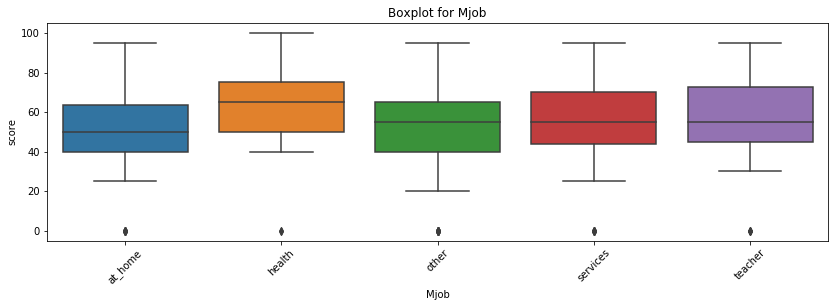

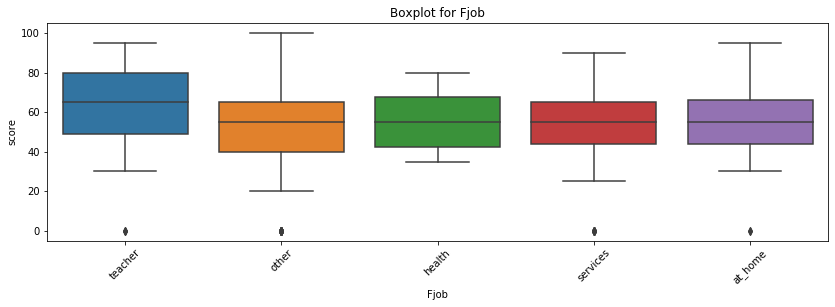

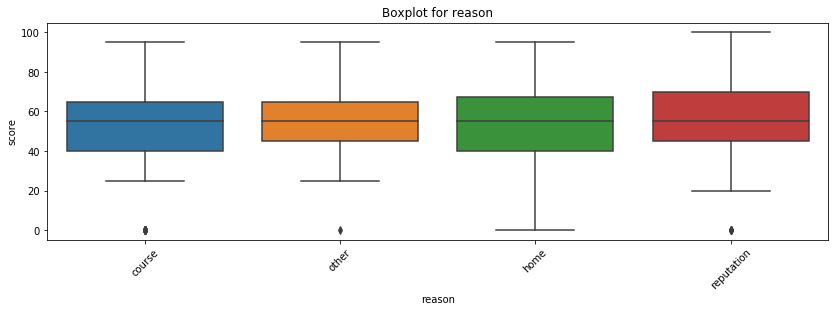

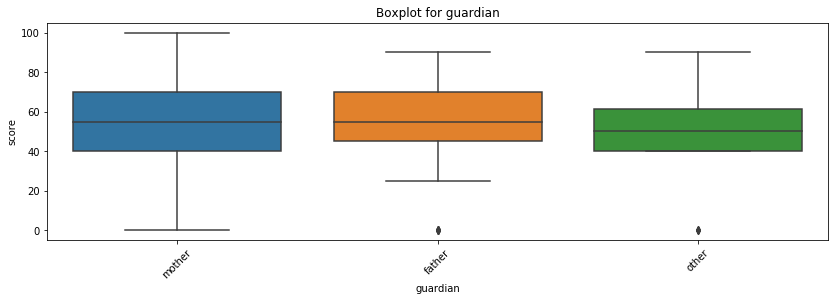

In [202]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [203]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [204]:
for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


Анализ показал, что статистически значимые различия есть только для колонки Mjob, оставим ее в датасете, а Fjob, reason и guardian уберем.

In [207]:
data = data.drop(['Fjob', 'reason', 'guardian'], axis = 1)

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 26 columns):
school        390 non-null int64
sex           390 non-null int64
age           390 non-null int64
address       390 non-null int64
famsize       390 non-null int64
Pstatus       390 non-null int64
Medu          390 non-null float64
Fedu          390 non-null float64
Mjob          390 non-null object
traveltime    390 non-null float64
studytime     390 non-null float64
failures      390 non-null float64
schoolsup     390 non-null float64
famsup        390 non-null float64
paid          390 non-null float64
activities    390 non-null float64
nursery       390 non-null float64
higher        390 non-null float64
internet      390 non-null float64
romantic      390 non-null float64
famrel        390 non-null float64
freetime      390 non-null float64
goout         390 non-null float64
health        390 non-null float64
absences      390 non-null float64
score         384 non-null float6

Выводы:

1. В достаточно большом количестве признаков были пропущенные значений, большинство из которых удалось устранить.

2. Выбросы были найдены только в столбцах Fedu, famrel и absences, что говорит о том, что данные довольно чистые.

3. Присутствует довольно логичная корреляция целевой переменной со следующими признаками: age (чем меньше возраст, тем выше баллы), Medu и Fedu (чем выше уровень образования родителей, тем выше баллы), studytime (чем больше времени ученик уделяет учебе вне школы, тем выше баллы), failures (чем меньше у ученика внеучебных неудач, тем выше баллы), romantic и goout (кто не состоит в романтических отношениях и меньше времени проводит с друзьями, у того выше баллы), higher (у учеников, которые хотят получить высшее образование, обычно выше баллы), schoolsup (у учеников, не получающих дополнительную образовательную поддержку в школе, баллы выше - это наверно потому, что дополнительные занятия обычно бывают у отстающих). Также присутствует корреляция признака address и целевой переменной (у учеников, проживающих в городе, баллы выше). И небольшая, но совсем нелогичная для меня корреляция: absences (при росте количества пропусков балл выше - может это актуально для учеников, участвующих в олимпиадах и конференциях, и поэтому пропускающих занятия), health (чем хуже здоровье учеников, тем баллы несколько выше).

4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это:
school        
sex           
age           
address       
famsize       
Pstatus       
Medu          
Fedu          
Mjob          
traveltime    
studytime     
failures      
schoolsup     
famsup        
paid          
activities    
nursery       
higher        
internet      
romantic      
famrel        
freetime      
goout         
health        
absences      